<a href="https://colab.research.google.com/github/kh9yaz/124Rus/blob/master/ITOI_lab_4_20_03_2023_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Задание 4. Задача классификации</h1>

МИЗ24-01

Ефимов Еонстантин Алексеевич

Задание 4. Задача классификации

# Импорт необходимых пакетов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# sklearn packages
import sklearn.metrics as mtrx # меры качества

# "случайный лес", random forest
from sklearn.ensemble import RandomForestClassifier
# разбиение выборкина обучающую/тестовую
from sklearn.model_selection import train_test_split
# оценка точности классификации
from sklearn.metrics import accuracy_score
# к-ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
# поиск по решетке
from sklearn.model_selection import GridSearchCV

In [3]:
# отключить некоторые предупреждения (это не ошибки, на работу не влияют)
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

# Импорт данных задачи

"Ирисы Фишера" из пакета seaborn

In [4]:
data = sns.load_dataset('iris')
data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


Выделим для удобства аттрибуты и метки класов

In [5]:
attributes = data.drop(columns=['species']).columns.values
print("аттрибуты:", attributes)
labels = 'species'
print("метки:", labels)

аттрибуты: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
метки: species


## Разбивка на обучающую/тестовую выборки

In [6]:
# если данные хранятся в разных массивах numpy
# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25)

# если данные в dataframe
train_data, test_data = train_test_split(data, test_size=0.25)

Выборки формируются каждый раз случайно

In [7]:
train_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa
58,6.6,2.9,4.6,1.3,versicolor
101,5.8,2.7,5.1,1.9,virginica


In [8]:
test_data.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
29,4.7,3.2,1.6,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica


Число примеров разных классов выборках

In [9]:
train_data[labels].value_counts()

,count
species,
versicolor,40
virginica,38
setosa,34


In [10]:
test_data[labels].value_counts()

,count
species,
setosa,16
virginica,12
versicolor,10


<Axes: xlabel='species'>

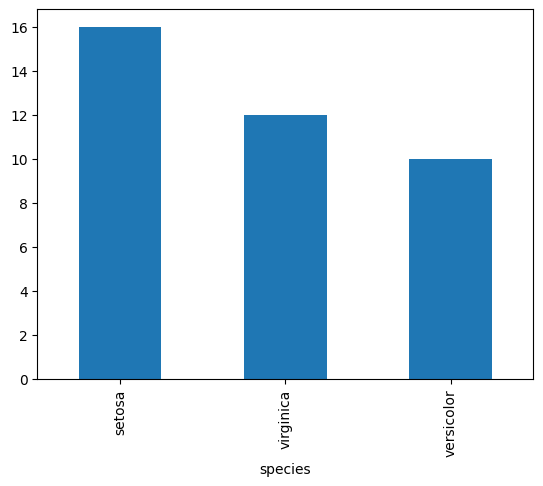

In [11]:
# функция value_counts() возвращает серию dataframe
test_data[labels].value_counts().plot(kind='bar')

Если число классов несбалансировано (число примеров одного из классов сильно больше или меньше, чем других), то используется стратифицированный отбор.

In [14]:
train_data, test_data = train_test_split(data, test_size=0.25,
                                         stratify=data[labels])

In [13]:
train_data[labels].value_counts()

,count
species,
setosa,38
versicolor,37
virginica,37


In [15]:
test_data[labels].value_counts()

,count
species,
setosa,13
versicolor,13
virginica,12


# Алгоритм Random Forest (Случайный лес деревьев решений)

Попытка №1

In [16]:
rf1 = RandomForestClassifier(n_estimators=2)
rf1.fit(train_data[attributes], train_data[labels])

RandomForestClassifier(n_estimators=2)

In [17]:
predicted_labels = rf1.predict(train_data[attributes])
print("точность на обучающей выборке:")
print(accuracy_score(train_data[labels], predicted_labels)*100, '%')

точность на обучающей выборке:
98.21428571428571 %


In [18]:
predicted_labels = rf1.predict(test_data[attributes])
print("точность на тестовой выборке (обобщение, generalization):")
print(accuracy_score(test_data[labels], predicted_labels)*100, '%')

точность на тестовой выборке (обобщение, generalization):
92.10526315789474 %


Попытка №2

Решите задачу еще раз как в примере выше. Отличаются ли разультаты?

In [ ]:
# ваш код

Точность на обучающей выборке: 100.0 %
Точность на тестовой выборке: 92.10526315789474 %

Матрица ошибок:
[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



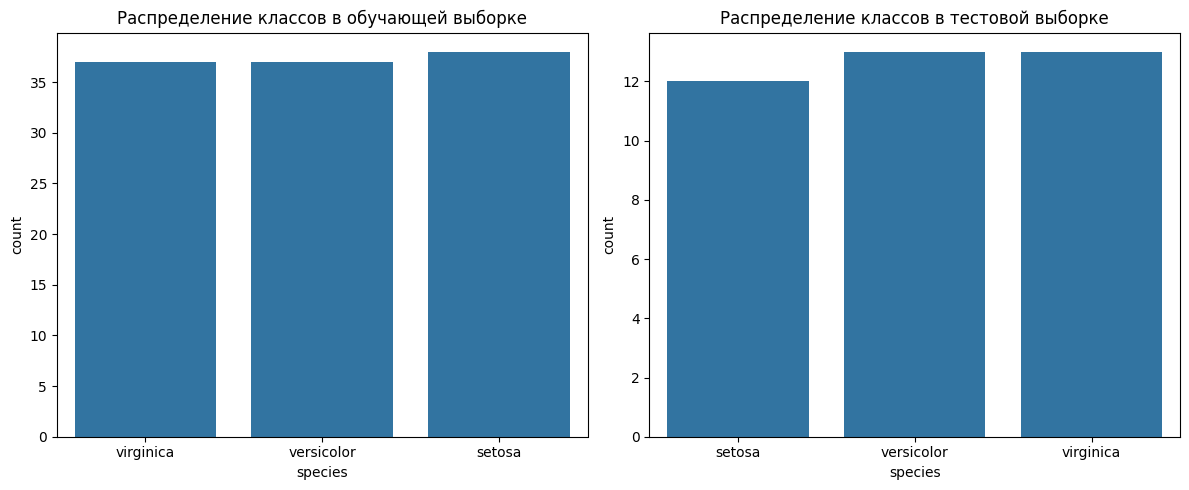

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Отключение предупреждений (необязательно)
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
data = sns.load_dataset('iris')

# Определение признаков и целевой переменной
attributes = data.drop(columns=['species']).columns.values
labels = 'species'

# Разбиение на обучающую и тестовую выборки с стратификацией и фиксированным random_state
train_data, test_data = train_test_split(
    data,
    test_size=0.25,
    stratify=data[labels],
    random_state=42  # Фиксируем случайность
)

# Создание и обучение модели случайного леса
# Увеличиваем количество деревьев для стабильности
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_data[attributes], train_data[labels])

# Предсказание на обучающей и тестовой выборках
train_predictions = rf_model.predict(train_data[attributes])
test_predictions = rf_model.predict(test_data[attributes])

# Оценка точности
print("Точность на обучающей выборке:", accuracy_score(train_data[labels], train_predictions) * 100, '%')
print("Точность на тестовой выборке:", accuracy_score(test_data[labels], test_predictions) * 100, '%')

# Дополнительная оценка: матрица ошибок и отчет по классификации
print("\nМатрица ошибок:")
print(confusion_matrix(test_data[labels], test_predictions))

print("\nОтчет по классификации:")
print(classification_report(test_data[labels], test_predictions))

# Визуализация распределения классов (для проверки стратификации)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=labels, data=train_data)
plt.title('Распределение классов в обучающей выборке')

plt.subplot(1, 2, 2)
sns.countplot(x=labels, data=test_data)
plt.title('Распределение классов в тестовой выборке')

plt.tight_layout()
plt.show()

## Независимые запуски, анализ статистики

Поскольку многие алгоритмы используют случаные числа, то делать выводы по 1 запуску нельзя.

Необходим анализ вариации результатов.

Число независимых запусков - прогоны (runs). Рекомендутся делать не менее 40-100 прогонов.

In [20]:
n_runs = 100

In [21]:
n_trees = [1, 2, 3, 4, 5, 10]

accuracy_data = pd.DataFrame()

# цикл перебора параметров (алгоритмов, настроек, задач и т.д.)
for n in n_trees:

  print("Runs for n =", n)
  accuracy_array = []

  # цикл прогонов
  start_time = time.time()
  for j in range(n_runs):
    rf = RandomForestClassifier(n_estimators = n)
    rf.fit(train_data[attributes], train_data[labels])
    predicted_labels = rf.predict(test_data[attributes])
    accuracy_array.append( accuracy_score(test_data[labels],
                                          predicted_labels)*100)
  stop_time = time.time()
  print("Время работы для n =",n,":",(stop_time-start_time), "секунд.")
  name = 'n_trees='+str(n)
  accuracy_data[name] = accuracy_array

Runs for n = 1
Время работы для n = 1 : 0.9614231586456299 секунд.
Runs for n = 2
Время работы для n = 2 : 0.8286323547363281 секунд.
Runs for n = 3
Время работы для n = 3 : 1.0337944030761719 секунд.
Runs for n = 4
Время работы для n = 4 : 0.8710832595825195 секунд.
Runs for n = 5
Время работы для n = 5 : 0.9857876300811768 секунд.
Runs for n = 10
Время работы для n = 10 : 1.479660987854004 секунд.


In [22]:
accuracy_data.head(3)

,n_trees=1,n_trees=2,n_trees=3,n_trees=4,n_trees=5,n_trees=10
0,92.105263,92.105263,92.105263,92.105263,94.736842,92.105263
1,94.736842,84.210526,89.473684,89.473684,92.105263,92.105263
2,94.736842,94.736842,86.842105,89.473684,89.473684,92.105263


Можно сопоставить результаты по средним и СКО или медиане.

In [23]:
accuracy_data.describe()

,n_trees=1,n_trees=2,n_trees=3,n_trees=4,n_trees=5,n_trees=10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,91.315789,89.157895,92.315789,90.394737,92.500000,91.315789
std,3.823596,3.330394,2.937555,2.317064,2.434830,1.851385
min,81.578947,81.578947,84.210526,84.210526,86.842105,86.842105
25%,89.473684,86.842105,89.473684,89.473684,89.473684,89.473684
50%,92.105263,89.473684,92.105263,89.473684,92.105263,92.105263
75%,94.736842,90.131579,94.736842,92.105263,94.736842,92.105263
max,97.368421,97.368421,97.368421,97.368421,97.368421,97.368421


Для наглядности можно построить график box-plot.

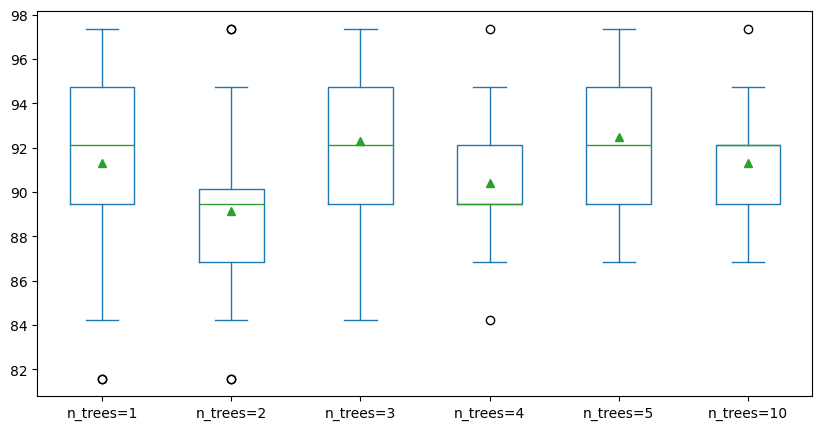

In [24]:
accuracy_data.plot(kind='box', showmeans=True, figsize=(10,5))
plt.show()

Опишите, какой из вариантов лучше по медианной точности. Какой из алгоритмов стабильнее (меньше вариация)?

Лучший вариант по медианной точности n_estimators=10, так как с увеличением количества деревьев медианная точность модели растёт. Это связано с тем, что случайный лес усредняет предсказания множества деревьев, снижая дисперсию и улучшая обобщение.

Стабильнее вариант n_estimators=10, так как с увеличением n_estimators уменьшается стандартное отклонение и межквартильный размах; при малом числе деревьев точность сильно варьируется между прогонами из-за случайности в построении деревьев; при n=10 модель "сглаживает" случайные шумы, и вариация точности минимальна.

## Проблема разбиения на выборки

Зафиксируем 10 деревьев, проверим вариацию в зависимости от разбивки на обучение/тест.

In [25]:
accuracy_array = []
for j in range(n_runs):
    train, test = train_test_split(data, test_size=0.25)
    rf = RandomForestClassifier(n_estimators = 10)
    rf.fit(train[attributes], train[labels])
    predicted_labels = rf.predict(test[attributes])
    accuracy_array.append( accuracy_score(test[labels],
                                          predicted_labels)*100)

accuracy_data = pd.DataFrame(accuracy_array)

accuracy_data.describe()

,0
count,100.000000
mean,95.078947
std,2.960681
min,89.473684
25%,92.105263
50%,94.736842
75%,97.368421
max,100.000000


<Axes: >

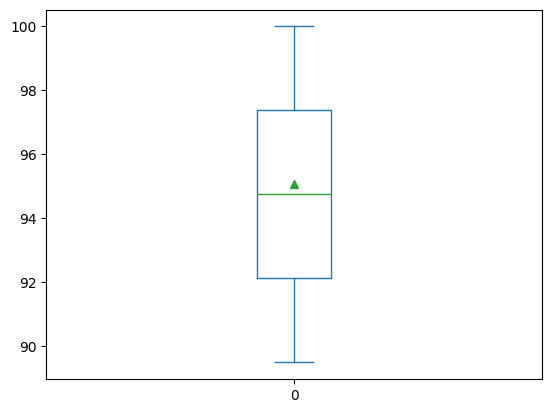

In [26]:
accuracy_data.plot(kind='box', showmeans=True)

Какой можно сделать вывод про процедуру разделения выборки?

Процедура разделения выборки влияет на точность модели, но при фиксированном n_estimators=10 и стратификации эта вариация минимальна

# Самостоятельно

Найти оптимальное число деревьев по среднему по разбивке и по запускам RF.

n_trees = [1, 15], n_runs = 40

Построить график изменения точности от числа деревьев.

*Примечание. Вычисления займут много времени.*

In [ ]:
# ваш код

Запуски для n_estimators = 1
Запуски для n_estimators = 2
Запуски для n_estimators = 3
Запуски для n_estimators = 5
Запуски для n_estimators = 8
Запуски для n_estimators = 11
Запуски для n_estimators = 15

Средняя точность и стандартное отклонение:
   n_trees       mean       std
0        1  94.276316  4.374648
1        2  95.065789  3.484438
2        3  95.263158  3.274934
3        5  95.000000  3.026976
4        8  93.355263  3.152689
5       11  94.539474  3.002680
6       15  95.131579  3.070657


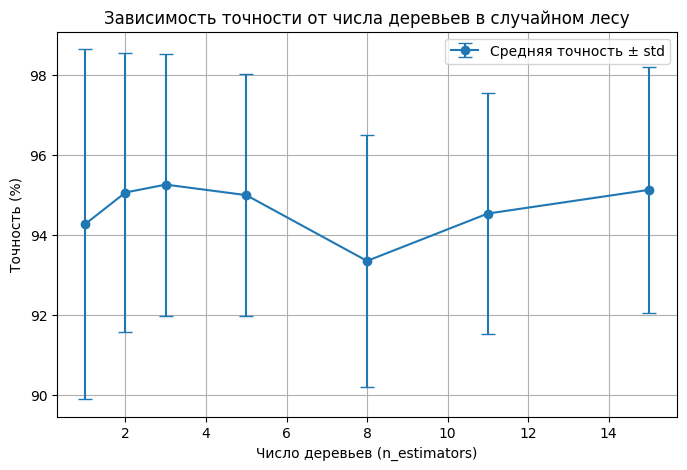

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка данных
data = sns.load_dataset('iris')
attributes = data.drop(columns=['species']).columns.values
labels = 'species'

# Параметры
n_trees = [1, 2, 3, 5, 8, 11, 15]
n_runs = 40

# Хранилище результатов
results = {
    'n_trees': [],
    'accuracy': []
}

# Цикл по количеству деревьев
for n in n_trees:
    print(f"Запуски для n_estimators = {n}")
    for j in range(n_runs):
        # Случайное разбиение данных
        train, test = train_test_split(data, test_size=0.25)

        # Модель
        rf = RandomForestClassifier(n_estimators=n, random_state=42)
        rf.fit(train[attributes], train[labels])

        # Предсказание и точность
        pred = rf.predict(test[attributes])
        acc = accuracy_score(test[labels], pred) * 100

        # Сохранение результатов
        results['n_trees'].append(n)
        results['accuracy'].append(acc)

# Преобразование в DataFrame
results_df = pd.DataFrame(results)

# Статистика по группам
summary = results_df.groupby('n_trees')['accuracy'].agg(['mean', 'std']).reset_index()
print("\nСредняя точность и стандартное отклонение:")
print(summary)

# График
plt.figure(figsize=(8, 5))
plt.errorbar(
    summary['n_trees'],
    summary['mean'],
    yerr=summary['std'],
    fmt='o-',
    capsize=5,
    label='Средняя точность ± std'
)
plt.xlabel('Число деревьев (n_estimators)')
plt.ylabel('Точность (%)')
plt.title('Зависимость точности от числа деревьев в случайном лесу')
plt.grid(True)
plt.legend()
plt.show()